# Question b

In [1]:
import numpy as np
from scipy.stats import uniform, truncnorm, truncexpon, crystalball
from scipy.integrate import quad, dblquad, simpson
import matplotlib.pyplot as plt

In [2]:
# Parameters
mu, sigma, beta, m, f, lmda, mu_b, sigma_b = 3, 0.3, 1, 1.4, 0.6, 0.3, 0, 2.5

In [3]:
# Define the crystal ball distribution with given parameters
cb = crystalball(beta, m, loc=mu, scale=sigma)

# Define the truncated exponential distribution with given parameters
g_s = lambda x: cb.pdf(x) / (cb.cdf(5) - cb.cdf(0))
h_s = lambda x: truncexpon.pdf(x, b=10*lmda, loc=0, scale=1/lmda)
g_b = lambda x: uniform.pdf(x, scale=5)
h_b = lambda x: truncnorm.pdf(x, a=(0-mu_b)/sigma_b, b=(10-mu_b)/sigma_b, loc=mu_b, scale=sigma_b)

# Joint density function
s_xy = lambda y, x: g_s(x) * h_s(y)
b_xy = lambda y, x: g_b(x) * h_b(y)
f_xy = lambda y, x: f * g_s(x) * h_s(y) + (1 - f) * g_b(x) * h_b(y)

In [4]:
# Check if normalisation is satisfied
print("CDF of g_s in range x=[0,5 is", quad(g_s, 0, 5)[0])
print("CDF of h_s in range y=[0,10] is", quad(h_s, 0, 10)[0])
print("CDF of g_b in range x=[0,5] is", quad(g_b, 0, 5)[0])
print("CDF of h_b in range y=[0,10] is", quad(h_b, 0, 10)[0])
print("CDF of s_xy in range x=[0,5], y=[0,10] is", dblquad(s_xy, 0, 5, 0, 10)[0])
print("CDF of b_xy in range x=[0,5], y=[0,10] is", dblquad(b_xy, 0, 5, 0, 10)[0])
print("CDF of f_xy in range x=[0,5], y=[0,10] is", dblquad(f_xy, 0, 5, 0, 10)[0])

CDF of g_s in range x=[0,5 is 1.0000000376260723
CDF of h_s in range y=[0,10] is 1.0
CDF of g_b in range x=[0,5] is 1.0000000000000002
CDF of h_b in range y=[0,10] is 1.0
CDF of s_xy in range x=[0,5], y=[0,10] is 1.0000000376260723
CDF of b_xy in range x=[0,5], y=[0,10] is 1.0000000000000002
CDF of f_xy in range x=[0,5], y=[0,10] is 1.0000000225756434


# Question c

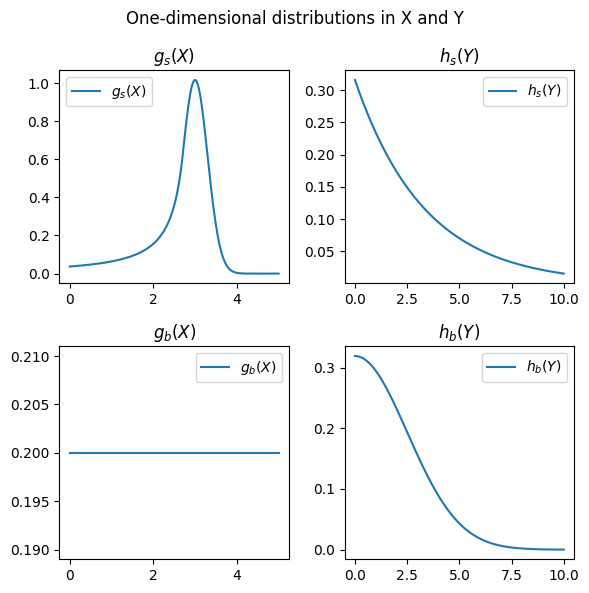

In [5]:
# One-dimensional distributions in X and Y
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
fig.suptitle('One-dimensional distributions in X and Y')
x = np.linspace(0, 5, 200)
y = np.linspace(0, 10, 200)

# Plot g_s(x)
axs[0, 0].plot(x, g_s(x), label='$g_s(X)$')
axs[0, 0].set_title('$g_s(X)$')
axs[0, 0].legend()

# Plot h_s(y)
axs[0, 1].plot(y, h_s(y), label='$h_s(Y)$')
axs[0, 1].set_title('$h_s(Y)$')
axs[0, 1].legend()

# Plot g_b(x)
axs[1, 0].plot(x, g_b(x), label='$g_b(X)$')
axs[1, 0].set_title('$g_b(X)$')
axs[1, 0].legend()

# Plot h_b(y)
axs[1, 1].plot(y, h_b(y), label='$h_b(Y)$')
axs[1, 1].set_title('$h_b(Y)$')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

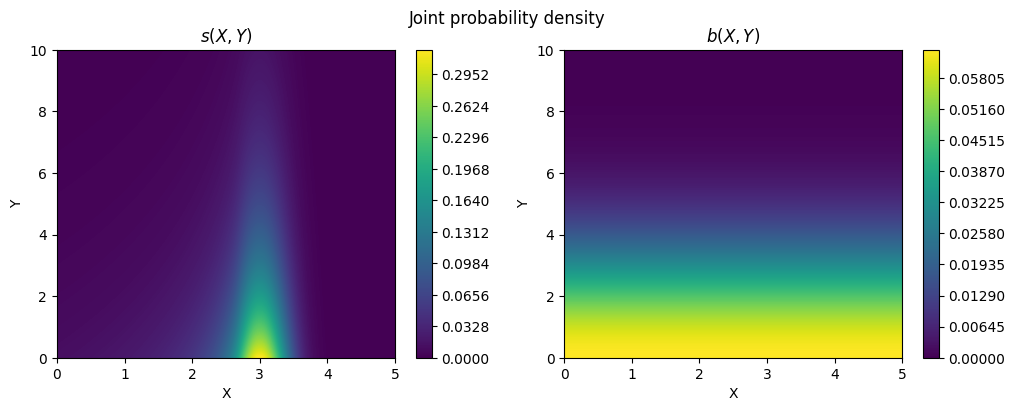

In [8]:
# Joint probability density
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Joint probability density')
X, Y = np.meshgrid(x, y)
Z_s = s_xy(Y, X)
Z_b = b_xy(Y, X)

contour_s = axs[0].contourf(X, Y, Z_s, levels=500)
axs[0].set_title('$s(X, Y)$')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
fig.colorbar(contour_s, ax=axs[0])

contour_b = axs[1].contourf(X, Y, Z_b, levels=500)
axs[1].set_title('$b(X, Y)$')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
fig.colorbar(contour_b, ax=axs[1])


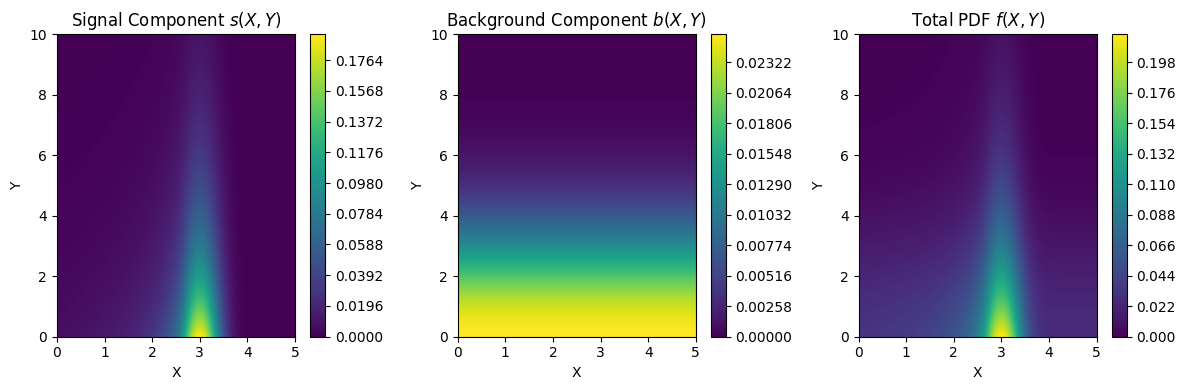

In [ ]:
# Total PDF f(x, y)
Z_f_signal = f * Z_s
Z_f_background = (1 - f) * Z_b
Z_f = Z_f_signal + Z_f_background

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

contour_f_signal = axs[0].contourf(X, Y, Z_f_signal, levels=500, cmap='viridis')
axs[0].set_title('Signal Component $s(X,Y)$')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
fig.colorbar(contour_f_signal, ax=axs[0])

contour_f_background = axs[1].contourf(X, Y, Z_f_background, levels=500, cmap='viridis')
axs[1].set_title('Background Component $b(X,Y)$')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
fig.colorbar(contour_f_background, ax=axs[1])

contour_f = axs[2].contourf(X, Y, Z_f, levels=500, cmap='viridis')
axs[2].set_title('Total PDF $f(X,Y)$')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
fig.colorbar(contour_f, ax=axs[2])

plt.tight_layout()
plt.show()